In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_questao_1 = pd.read_csv('questao_1.csv', index_col='num_compra')
df_questao_2 = pd.read_csv('questao_2.csv', index_col='Loja')

## Primeira Consulta: Quem mais vendeu em tal unidade

Devido a certa ambiguidade na consulta solicitada, serão utilizadas duas aborgadens.

Abordagem 1: Dada uma unidade como entrada, qual vendedor teve maior número de vendas nela.

Abordagem 2: Para cada unidade, qual vendedor teve maior número de vendas.

### Abordagem 1

In [3]:
def top_vendedor_unidade(df, unidade_consultada):
    """ Função que busca o vendedor com maior número de vendas em determinada unidade e retorna um dataframe com os dados desse vendedor.

    Parâmetros
    -------------
    df : pandas.DataFrame
        Dataframe com os dados dos vendedores
    
    unidade_consultada : str
        Unidade a ser consultada à procura de seu melhor vendedor
    
    Retorna
    -------------
    df_resultado : pandas.DataFrame
        Dataframe com nome, usuário e total de vendas feitas pelo vendedor com maior número de vendas na unidade solicitada.
    """

    # Seleciona as instâncias correspondentes à unidade solicitada
    df_unidade = df[df['Filial'] == unidade_consultada]

    # Extrai o ID dos vendedores
    vendedores = df_unidade['usuario'].unique()

    # Cria uma lista de tuplas no formato (quantidade de vendas do vendedor, ID do vendedor) e ordeno a lista de forma decrescente com base na quantidade de vendas
    rank = sorted([(df_unidade[df_unidade['usuario'] == vendedor].shape[0], vendedor) for vendedor in vendedores], key=lambda x: -x[0])

    resultado = {
        'Nome' : df_unidade[df_unidade['usuario'] == rank[0][1]]['nome'].unique(),
        'Usuário' : rank[0][1],
        'Total de Vendas': rank[0][0]
    }

    # Seleciona as colunas de Nome e Usuario que correspondem ao identificador do vendedor que é o primeiro da lista
    df_resultado = pd.DataFrame(resultado)

    return df_resultado

In [4]:
# ADICIONE AQUI A UNIDADE QUE DESEJA CONSULTAR
unidade_consultada = 'Loja Manoa'

In [5]:
top_vendedor_unidade(df_questao_1, unidade_consultada)

,Nome,Usuário,Total de Vendas
0,Alessandra,465620,93


### Abordagem 2

In [6]:
def top_vendedores_todas_unidades(df):
    """ Função que busca o vendedor com maior número de vendas em cada unidade separadamente e retorna um dataframe com os vendedores por unidade.

    Parâmetros
    -------------
    df : pandas.DataFrame
        Dataframe com os dados dos vendedores
    
    Retorna
    -------------
    df_resultado : pandas.DataFrame
        Dataframe com nome, usuário, total de vendas e a unidade de cada vendedor com maior número de vendas por unidade.
    """

    # Extrai as unidade
    unidades = df['Filial'].unique()

    # Extrai os vendedores
    vendedores = df['usuario'].unique()

    top_vendedores = []
    vendas = []
    vendedores_resultado = []

    # Para cada unidade extraia o maior vendedor e adiciona em uma lista
    for unidade in unidades:
        df_unidade = df[df['Filial'] == unidade]
        top_vendedores.append(sorted([(df_unidade[df_unidade['usuario'] == vendedor].shape[0], vendedor) for vendedor in vendedores], key=lambda x: -x[0])[0])

    # Separa os dados dos vendedores para a criação de um dataframe
    usuarios = [vendedor[1] for vendedor in top_vendedores]
    vendas = [vendedor[0] for vendedor in top_vendedores]
    vendedores_resultado = [df[df['usuario'] == vendedor[1]]['nome'].unique()[0] for vendedor in top_vendedores]

    resultado = {
        'Nome' : vendedores_resultado,
        'Usuário' : usuarios,
        'Total de Vendas' : vendas,
        'Unidade' : unidades
    }

    df_resultado = pd.DataFrame(resultado)

    return df_resultado


In [7]:
top_vendedores_todas_unidades(df_questao_1)

,Nome,Usuário,Total de Vendas,Unidade
0,Marina,466205,78,Loja Armando Mendes
1,Alessandra,465620,93,Loja Manoa
2,Giselle,842680,54,Loja Cachoerinha


## Segunda Consulta: venda por vendedor(nome)

Abordagem 1: Total de vendas por vendedor. A consulta será feita por nome, porém assumindo que há vendedores com nomes repetidos e que possuem usuários diferentes,
será feita uma lista com o total de vendas de cada vendedor com o nome solicitado que possui um usuário diferente.

Abordagem 2: Vendas feitas por vendedores com o nome solicitado


### Abordagem 1

In [8]:
def consulta_vendedor(df, vendedor_procurado):
    """ Função que busca o total de vendas feitas por um vendedor. A busca é feita por nome.

    Parâmetros
    -------------
    df : pandas.DataFrame
        Dataframe com os dados dos vendedores
    
    vendedor_procurado : str
        Nome do vendedor a ser procurado
    
    Retorna
    -------------
    df_total_vendas : pandas.DataFrame
        Dataframe com nome, usuário, total de vendas de todos os vendedores com o nome buscado.
    """

    vendedores = df[df['nome'] == vendedor_procurado]['usuario'].unique()
    vendas_vendedor = [(df[df['usuario'] == vendedor].shape[0], vendedor) for vendedor in vendedores]
    total_vendas = [x[0] for x in vendas_vendedor]
    vendedor = [x[1] for x in vendas_vendedor]
    nome = [vendedor_procurado for x in vendas_vendedor]

    dicionario = {
        'Usuario' : vendedor,
        'Nome' : nome ,
        'Total de Vendas' : total_vendas
        
    }

    df_total_vendas = pd.DataFrame(dicionario)

    return df_total_vendas

In [9]:
# ADICIONE AQUI O VENDEDOR QUE DESEJA PROCURAR
vendedor_procurado = 'Daniel'

In [10]:
consulta_vendedor(df_questao_1, vendedor_procurado)

,Usuario,Nome,Total de Vendas
0,295,Daniel,3
1,30646,Daniel,3
2,35553,Daniel,1
3,40859,Daniel,1
4,56424,Daniel,9
5,66657,Daniel,12
6,114728,Daniel,3
7,139130,Daniel,1
8,219436,Daniel,3
9,285290,Daniel,6


### Abordagem 2

In [11]:
def consulta_vendas_por_vendedor(df, vendedor_procurado):
    """ Função retorna todas as vendas executadas por vendedores que possuem o nome igual a vendedor_procurado.

    Parâmetros
    -------------
    df : pandas.DataFrame
        Dataframe com os dados dos vendedores
    
    vendedor_procurado : str
        Nome do vendedor a ser procurado
    
    Retorna
    -------------
    pandas.DataFrame
        Dataframe com todas as vendas executadas pelos vendedores com nome igual a vendedor_procurado.
    """

    return df[df['nome'] == vendedor_procurado]

In [12]:
# ADICIONE AQUI O VENDEDOR QUE DESEJA PROCURAR
vendedor_procurado = 'Daniel'

In [13]:
consulta_vendas_por_vendedor(df_questao_1, vendedor_procurado)

,usuario,nome,dados,Filial,data_compra,valor_compra,Imposto,Informado sobre imposto?
num_compra,,,,,,,,
24937847,295,Daniel,12,Loja Armando Mendes,2019-01-06 11:53:01,R$129.12,R$2.60,Sim
23600787,295,Daniel,12,Loja Manoa,2019-06-01 17:27:11,R$95.96,R$1.94,Sim
24298956,295,Daniel,12,Loja Manoa,2019-06-22 16:40:21,R$506.05,R$10.21,Sim
21988407,30646,Daniel,12,Loja Manoa,2019-05-03 20:01:44,R$157.21,R$3.17,Não informado
25154958,30646,Daniel,12,Loja Manoa,2019-01-10 19:49:02,R$23.46,R$0.47,Não informado
...,...,...,...,...,...,...,...,...
22762448,916961,Daniel,12,Loja Armando Mendes,2019-05-19 13:05:01,R$132.64,R$2.67,Sim
21852745,929262,Daniel,12,Loja Manoa,2019-05-01 12:14:49,R$161.99,R$3.27,Sim
21852840,929262,Daniel,12,Loja Manoa,2019-05-01 12:17:40,R$84.68,R$1.71,Sim


## Terceira Consulta: produto mais vendido

Ranking dos produtos mais vendidos, com a quantidade vendida e o valor total vendido

In [29]:
def preco_para_int(df, coluna):
    """ Função que transforma uma coluna que possui preços com os caractéres 'R$' em uma coluna de inteiros.

    Parâmetros
    -------------
    df : pandas.DataFrame
        Dataframe a ser modificado

    coluna : str
        Coluna que deseja usar a transformação
    
    Retorna
    -------------
    df_result : pandas.DataFrame
        Cópia do dataframe passado como parâmetro com a coluna de preços transformada para inteiros.
    """
    df_result = df.copy()
    df_result[coluna] = df_result[coluna].replace('[R\$\s\,]', '', regex=True).astype(float)
    return df_result

In [30]:
def top_produtos(df):
    """ Função que retorna um ranking com os produtos mais vendidos no conjunto de dados.

    Parâmetros
    -------------
    df : pandas.DataFrame
        Dataframe com os dados dos produtos vendidos
    
    Retorna
    -------------
    df_top_produtos : pandas.DataFrame
        Dataframe ranking dos produtos mais vendidos.
    """

    produtos = df['produto'].unique()

    total_produto = []

    for produto in produtos:
        total_produto.append((df[df['produto'] == produto]['quantidade'].sum(), 
                                produto, 
                                df[df['produto'] == produto]['valor_total'].sum()))

    total_produto = sorted(total_produto, key= lambda x: -x[0])

    vendas = []
    top_produtos = []
    valor_total = []

    for tup in total_produto:
        vendas.append(tup[0])
        top_produtos.append(tup[1])
        valor_total.append(tup[2])

    dic = {
        'Produto' : top_produtos,
        'Total de Vendas': vendas,
        'Valor total' : valor_total
    }

    df_top_produtos = pd.DataFrame(dic, index=range(1,len(top_produtos)+1))

    return df_top_produtos

In [16]:
df = preco_para_int(df_questao_2, 'valor_total')
top_produtos(df)

,Produto,Total de Vendas,Valor total
1,Açaí 1L,788,7260.93
2,Açaí 1L Zero,485,3175.78


## Consultas Adicionais

Ideias adicionais:

    - Top 5 vendedores por unidade
    - Top 5 vendedores por valor de venda
    - Verificar média de valor de venda por vendedor e fazer boxplot
    - Variação de vendas do vendedor ao decorrer do tempo
    - Vendas por unidade

## Top 5 vendedores por unidade

Nessa seção faremos uma análise comparativa entre dois tipos de rankings: o primeiro sendo formado pelos 5 vendedores que mais tiveram vendas fechadas, ou seja, vendedores que possuem uma maior quantidade de vendas; o segundo ranking é formado pelos 5 vendedores que mais venderam em relação ao valor dos produtos vendidos.

A comparação será feita separadamente por unidades

In [17]:
def gerar_dicionarios(df,tipo):
    """ Função gera um dicionário com top 5 vendedores por unidade baseado ou na quantidade de vendas ou no valor total vendido, dependendo da variável tipo.

    Parâmetros
    -------------
    df : pandas.DataFrame
        Dataframe com os dados dos vendedores.
    
    tipo : str
        Qual o tipo de ranking que deseja ser gerado. Se tipo é igual a 'quantidade', o ranking será baseado na quantidade de vendas por vendedor; se tipo igual a 'valor', o ranking será baseado         no valor total obtido das vendas.
    
    Retorna
    -------------
    top_5 : dict
        Dicionário com outros dicionários aninhados. Cada chave do dicionário representa uma unidade, e a cada unidade tem as informações de usuário, nome, vendas e unidade dos 5 melhores                vendedores
    """

    # Extrai as unidade
    unidades = df['Filial'].unique()

    # Extrai os vendedores
    vendedores = df['usuario'].unique()

    top_5 = {}

    if(tipo == 'quantidade'):
    # Para cada unidade extraia os 5 melhores vendedores baseado em quantidade e adiciona em um dicionário
        for unidade in unidades:
            df_unidade = df[df['Filial'] == unidade]
            top_vendedores = sorted([(df_unidade[df_unidade['usuario'] == vendedor].shape[0], vendedor) for vendedor in vendedores], key=lambda x: -x[0])[:5]

            top_5[unidade] = {
                'Usuários' : [vendedor[1] for vendedor in top_vendedores],
                'Nome' : [df[df['usuario'] == vendedor[1]]['nome'].unique()[0] for vendedor in top_vendedores],
                'Total de vendas' : [vendedor[0] for vendedor in top_vendedores],
                'Unidade' : [unidade for vendedor in top_vendedores]
            }

    elif(tipo == 'valor'):
    # Para cada unidade extraia os 5 melhores vendedores baseado em valor e adiciona em um dicionário
        for unidade in unidades:
            df_unidade = df[df['Filial'] == unidade]
            top_vendedores = sorted([(df_unidade[df_unidade['usuario'] == vendedor]['valor_compra'].sum(), vendedor) for vendedor in vendedores], key=lambda x: -x[0])[:5]

            top_5[unidade] = {
                'Usuários' : [vendedor[1] for vendedor in top_vendedores],
                'Nome' : [df[df['usuario'] == vendedor[1]]['nome'].unique()[0] for vendedor in top_vendedores],
                'Valor total vendido' : [vendedor[0] for vendedor in top_vendedores],
                'Unidade' : [unidade for vendedor in top_vendedores]
            }
    


    return top_5

In [18]:
def top_5_vendedores(df, tipo):
    """ Função gera uma lista com dataframes, cada dataframe tendo informações dos top 5 vendedores de cada unidade. Cada posição na lista é uma unidade diferente.

    Parâmetros
    -------------
    df : pandas.DataFrame
        Dataframe com os dados dos vendedores.
    
    tipo : str
        Qual o tipo de ranking que deseja ser gerado. Se tipo é igual a 'quantidade', o ranking será baseado na quantidade de vendas por vendedor; se tipo igual a 'valor', o ranking será baseado         no valor total obtido das vendas.
    
    Retorna
    -------------
    list_dfs : list
        Lista de DataFrames, na qual cada elemento na lista é contém informações de uma unidade diferente com o top 5 vendedores da unidade e suas informações.
    """
    list_dfs = []
    dics = gerar_dicionarios(df, tipo)

    chaves = dics.keys()

    for chave in chaves:
        dic = dics[chave]
        df = pd.DataFrame(dic, index=range(1,6))
        list_dfs.append(df)

    return list_dfs

In [19]:
df = preco_para_int(df_questao_1, 'valor_compra')
list_top_5_valor = top_5_vendedores(df, 'valor')
list_top_5_quantidade = top_5_vendedores(df, 'quantidade')

### Unidade Armando Mendes

In [20]:
print('Maiores vendedores por quantidade: \n')
display(list_top_5_quantidade[0])
print('\n\n')
print('Maiores vendedores por valor do produto: \n')
display(list_top_5_valor[0])

Maiores vendedores por quantidade: 



,Usuários,Nome,Total de vendas,Unidade
1,466205,Marina,78,Loja Armando Mendes
2,412597,Pedro,67,Loja Armando Mendes
3,568849,Marcilio,64,Loja Armando Mendes
4,144814,Juliana Gabriela,51,Loja Armando Mendes
5,754242,Raquel,49,Loja Armando Mendes





Maiores vendedores por valor do produto: 



,Usuários,Nome,Valor total vendido,Unidade
1,754242,Raquel,4831.91,Loja Armando Mendes
2,666544,Gaby,3894.40,Loja Armando Mendes
3,550827,Isabella,3363.11,Loja Armando Mendes
4,157030,Clara,3223.76,Loja Armando Mendes
5,622483,Mauricio,2989.50,Loja Armando Mendes


### Unidade Manoa

In [21]:
print('Maiores vendedores por quantidade: \n')
display(list_top_5_quantidade[1])
print('\n\n')
print('Maiores vendedores por valor do produto: \n')
display(list_top_5_valor[1])

Maiores vendedores por quantidade: 



,Usuários,Nome,Total de vendas,Unidade
1,465620,Alessandra,93,Loja Manoa
2,703346,leandro,59,Loja Manoa
3,125079,Adamastor,49,Loja Manoa
4,796822,Thiago,46,Loja Manoa
5,12567,Ruben,45,Loja Manoa





Maiores vendedores por valor do produto: 



,Usuários,Nome,Valor total vendido,Unidade
1,83270,LEONARDO,15575.05,Loja Manoa
2,478139,Mariza,9362.66,Loja Manoa
3,623984,MARIA,9089.10,Loja Manoa
4,272197,Felipe,7855.34,Loja Manoa
5,2906,Nathalia,7786.23,Loja Manoa


### Unidade Cachoeirinha

In [22]:
print('Maiores vendedores por quantidade: \n')
display(list_top_5_quantidade[2])
print('\n\n')
print('Maiores vendedores por valor do produto: \n')
display(list_top_5_valor[2])

Maiores vendedores por quantidade: 



,Usuários,Nome,Total de vendas,Unidade
1,842680,Giselle,54,Loja Cachoerinha
2,653139,Marcela,47,Loja Cachoerinha
3,594861,Marco,43,Loja Cachoerinha
4,677638,Bergson,40,Loja Cachoerinha
5,666920,Ana,39,Loja Cachoerinha





Maiores vendedores por valor do produto: 



,Usuários,Nome,Valor total vendido,Unidade
1,546900,Alexandre,6904.38,Loja Cachoerinha
2,842680,Giselle,5070.50,Loja Cachoerinha
3,845784,Irineu,4812.18,Loja Cachoerinha
4,653139,Marcela,4448.21,Loja Cachoerinha
5,677638,Bergson,4386.95,Loja Cachoerinha


### Análise

Analisando o resultado acima, podemos verificar uma diferença enorme dos vendedores. Na unidade Armando Mendes, apenas Raquel aparece nos dois rankings, sendo a quinta no ranking por quantidade e a primeira no ranking por valor vendido. Enquanto isso, os outros 4 vendedores que mais agregaram receita à empresa não aparecem no top 5 vendedores por quantidade de produtos vendidos. Esse padrão também se repete nas outras unidades, nos indicando que, para definir quem é o melhor vendedor da unidade, mais de uma métrica deve ser analisada e não apenas quantidade de vendas feitas ou valor total vendido.

## Média de Valor de Venda por Vendedor

Agora, vamos visualizar a média de valor vendido por cada vendedor, e separar essas médias por unidade. Utilizando um boxplot para cada unidade, podemos visualizar a distribuição do valor médio gerado por cada vendedor. Pode-se verificar uma assimetria e uma quantidade de _outliers_ bem grande. Enquanto os 3 quartis de cada boxplot se encontram entre R\$ 0 e R\$ 200, exceto o terceiro quartil da unidade Manoa, conseguimos verificar vendedores que se destacam muito chegando a ter uma média de vendas acima de **R\$ 1000,00**. Podemos também destacar a performance dos vendedores da unidade Manoa em relação às outras unidades. O primeiro quartil se aproxima muito do terceiro quartil da unidade Armando Mendes, mostrando certa superioridade.

In [23]:
def media_vendas_por_unidade(df):
    """ Função gera um dataframe com média de valor das vendas de cada vendedor e a qual unidade aquele vendedor pertence.

    Parâmetros
    -------------
    df : pandas.DataFrame
        Dataframe com os dados dos vendedores.
    
    Retorna
    -------------
    df_resultado : pandas.DataFrame
        Dataframe com a média de valor das vendas de cada vendedor e a unidade que pertence.
    """
    
    unidades = df['Filial'].unique()
    medias_vendas = []
    filiais = []

    for unidade in unidades:
        df_unidade = df[df['Filial'] == unidade]
        vendedores = df_unidade['usuario'].unique()
        medias_vendas.extend([df_unidade[df_unidade['usuario'] == vendedor]['valor_compra'].mean() for vendedor in vendedores])
        filiais.extend([unidade for vendedor in vendedores])

    media_unidade = {
        'Média Venda' : medias_vendas,
        'Filial' : filiais
    }
    
    df_resultado = pd.DataFrame(media_unidade)

    return df_resultado

In [24]:
df = preco_para_int(df, 'valor_compra')
medias = media_vendas_por_unidade(df)

<AxesSubplot:xlabel='Filial', ylabel='Média Venda'>

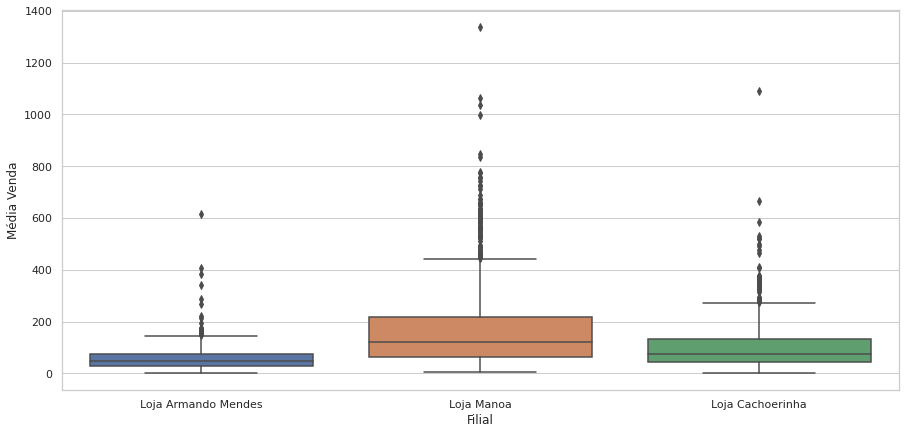

In [25]:
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
sns.boxplot(x='Filial', y='Média Venda', data=medias)

## Total vendido por dia por vendedor

Aqui visualizaremos o valor total vendido por determinado vendedor, à nossa escolha, por dia contabilizado no conjunto de dados. Basta inserir o Identificado de Usuário do vendedor no célula abaixo que será plotado seu histórico de vendas.

In [38]:
id_vendedor = 465620 # Número do Usuário a ser buscado

In [51]:
def vendas_por_mes(df, id_vendedor):
    """Função gera um dataframe com o valor total vendido diariamente por um vendedor e plota um gráfico com esses valores.

    Parâmetros
    -------------
    df : pandas.DataFrame
        Dataframe com os dados dos vendedores.

    id_vendedor : int
        Número de identificação do vendedor a ser consultado

    Retorna
    -------------
    vendas_diarias : pandas.DataFrame
        Dataframe com o total diário de valor vendido do vendedor consultado.
    """

    df_vendedor = df[df['usuario'] == id_vendedor]
    df_vendedor['data_compra'] = df_vendedor['data_compra'].apply(lambda line: line.split(' ')[0])

    vendas_diarias = df_vendedor.groupby('data_compra', sort=False)['valor_compra'].sum().sort_index().to_frame()

    fig = plt.figure(figsize=(20,10))
    sns.lineplot(x=vendas_diarias.index, y=vendas_diarias['valor_compra'])
    plt.xticks(rotation=45, horizontalalignment='right')
    fig.align_labels()

    return vendas_diarias

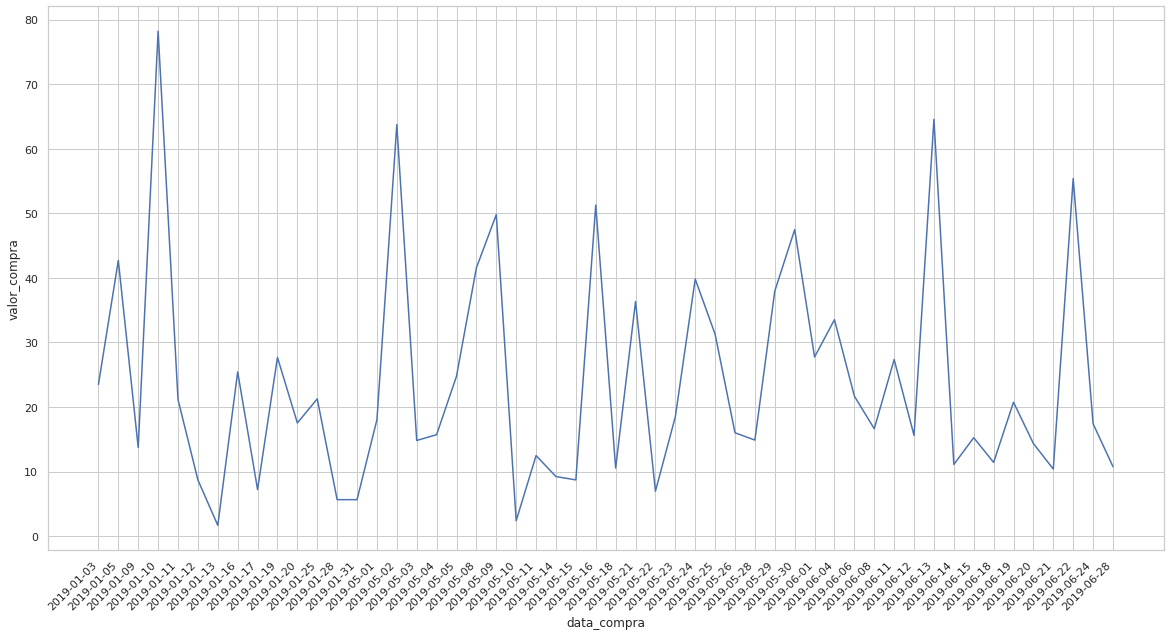

In [52]:
df = preco_para_int(df_questao_1, 'valor_compra')
vendas = vendas_por_mes(df, id_vendedor)

## Vendas por Unidade

Faremos aqui mais uma vez uma comparação entre valor gerado e quantidade de vendas, mas nesse caso focando nas unidades da Bemol. O primeiro gráfico mostra a porcentagem que cada unidade possui da quantidade total de vendas feitas pela Bemol, enquanto o segundo gráfico mostra a porcentagem que cada unidade possui do valor total gerado, ou seja, a soma dos preços de todas as vendas. Podemos verificar uma grande diferença nas unidades Armando Mendes e Manoa, enquanto a unidade Cachoeirinha se mantém próximo da mesma porcentagem nos dois gráficos.

Embora a unidade Cachoeirinha lidere por 0.1% na quantidade de vendas feitas, essa liderança é perdida no porcentagem de valor gerado, sendo ultrapassada pela unidade Manoa que possui 55.6%, graças, principalmente, ao pouco valor agregado pelas vendas na unidade Armando Mendes. Podemos ver que, na filial Armando Mendes, enquanto sua porcentagem de vendas chega a 22%, sua porcentagem no valor total das vendas é de apenas 11%, mostrando que grande parte de suas vendas têm preço baixo.

In [58]:
def plot_vendas_quantidade(df):
    """ Plota um gráfico com a porcentagem do número total de vendas que cada unidade possui.

    Parâmetros
    -------------
    df : pandas.DataFrame
        Dataframe com os dados de vendas.
    
    Retorna
    -------------
    """
    explode = (0, 0.1, 0)
    df['Filial'].value_counts().to_frame().sort_index().plot.pie(y='Filial', figsize=(10,10), autopct='%1.1f%%', explode=explode)

def plot_vendas_valor(df):
    """ Plota um gráfico com a porcentagem do valor total vendido por cada unidade.

    Parâmetros
    -------------
    df : pandas.DataFrame
        Dataframe com os dados de vendas.
    
    Retorna
    -------------
    """
    explode = (0,0,0.1)
    preco_para_int(df, 'valor_compra').groupby('Filial', sort=True)['valor_compra'].sum().to_frame().plot.pie(y='valor_compra', figsize=(10,10), autopct='%1.1f%%', explode=explode)

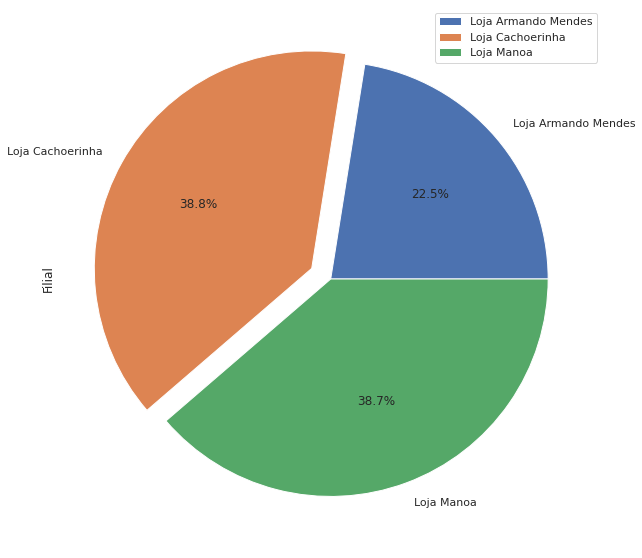

In [59]:
plot_vendas_quantidade(df_questao_1)

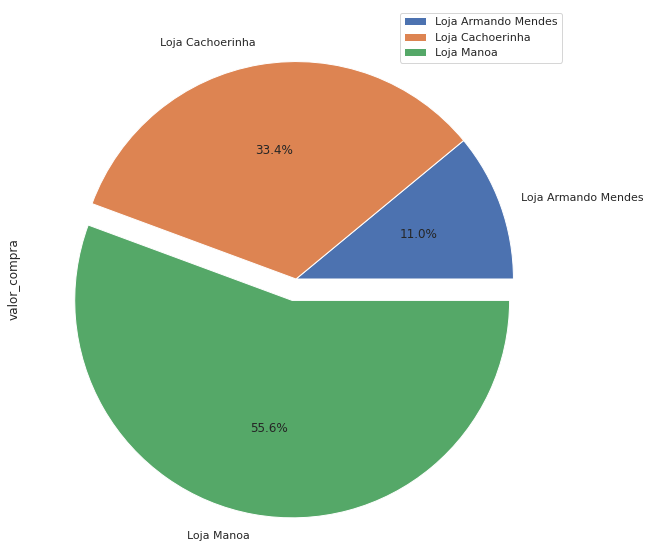

In [60]:
plot_vendas_valor(df_questao_1)